In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import random

# Data Wrangling

First, I need to read in the different individual csv files downloaded from the FRED Database and assign Column Names.

In [2]:
min_wage = pd.read_csv('FedMinWage.csv')
min_wage.columns = ['Date', 'Min Wage']
min_wage

,Date,Min Wage
0,1967-10-01,1.40
1,1968-01-01,1.60
2,1968-04-01,1.60
3,1968-07-01,1.60
4,1968-10-01,1.60
...,...,...
210,2020-04-01,7.25
211,2020-07-01,7.25
212,2020-10-01,7.25
213,2021-01-01,7.25


In [3]:
cpi = pd.read_csv('CPI.csv')
cpi.columns = ['Date', 'CPI']
cpi

,Date,CPI
0,1967-10-01,34.73361
1,1968-01-01,35.14344
2,1968-04-01,35.55328
3,1968-07-01,35.96311
4,1968-10-01,36.37295
...,...,...
210,2020-04-01,264.13627
211,2020-07-01,266.68033
212,2020-10-01,266.87910
213,2021-01-01,271.39037


In [4]:
unemployment_rate = pd.read_csv('UnemploymentRate.csv')
unemployment_rate.columns = ['Date', 'Unemployment Rate']
unemployment_rate

,Date,Unemployment Rate
0,1967-10-01,3.8
1,1968-01-01,3.7
2,1968-04-01,3.7
3,1968-07-01,3.4
4,1968-10-01,3.4
...,...,...
210,2020-04-01,11.1
211,2020-07-01,7.8
212,2020-10-01,6.7
213,2021-01-01,6.0


In [5]:
gdp = pd.read_csv('USGDPPerCapita.csv')
gdp.columns = ['Date', 'Per Capita GDP']
gdp

,Date,Per Capita GDP
0,1967-10-01,23144.0
1,1968-01-01,23566.0
2,1968-04-01,23905.0
3,1968-07-01,24025.0
4,1968-10-01,24054.0
...,...,...
210,2020-04-01,52314.0
211,2020-07-01,56182.0
212,2020-10-01,56732.0
213,2021-01-01,57568.0


In [6]:
lfp = pd.read_csv('LFParticip.csv')
lfp.columns = ['Date', 'Labor Force Participation']
lfp

,Date,Labor Force Participation
0,1967-10-01,59.9
1,1968-01-01,59.6
2,1968-04-01,60.0
3,1968-07-01,59.5
4,1968-10-01,59.7
...,...,...
210,2020-04-01,61.4
211,2020-07-01,61.4
212,2020-10-01,61.5
213,2021-01-01,61.5


In [7]:
med_income = pd.read_csv('MedianIncome.csv')
med_income.columns = ['Date', 'Median Income']
med_income.Date = pd.to_datetime(med_income.Date)
med_income.head()

,Date,Median Income
0,1974-01-01,25326
1,1975-01-01,24846
2,1976-01-01,24896
3,1977-01-01,25084
4,1978-01-01,24877


Next, I need to bring the individual dataframes together in to one dataframe, and convert the Date column to Datetime format.  I am using merge to bring in the median income data, as this dataframe does not have the same # of rows as the others.  The Median Income data is annual, as opposed to quarterly.

In [8]:
df_temp = pd.concat([min_wage, cpi.CPI, unemployment_rate['Unemployment Rate'], gdp['Per Capita GDP'], lfp['Labor Force Participation']], axis=1)
df_temp.Date = pd.to_datetime(df_temp.Date)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       215 non-null    datetime64[ns]
 1   Min Wage                   215 non-null    float64       
 2   CPI                        215 non-null    float64       
 3   Unemployment Rate          215 non-null    float64       
 4   Per Capita GDP             215 non-null    float64       
 5   Labor Force Participation  215 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 10.2 KB


In [9]:
#Performing the Merge and confirming

df = pd.merge(df_temp, med_income, how = 'outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       215 non-null    datetime64[ns]
 1   Min Wage                   215 non-null    float64       
 2   CPI                        215 non-null    float64       
 3   Unemployment Rate          215 non-null    float64       
 4   Per Capita GDP             215 non-null    float64       
 5   Labor Force Participation  215 non-null    float64       
 6   Median Income              47 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.4 KB


In [10]:
df.sample(10)

,Date,Min Wage,CPI,Unemployment Rate,Per Capita GDP,Labor Force Participation,Median Income
141,2003-01-01,5.15,188.72951,5.9,47027.0,66.3,31986.0
110,1995-04-01,4.25,156.25000,5.6,39760.0,66.5,NaN
130,2000-04-01,5.15,176.63934,4.0,46704.0,67.1,NaN
44,1978-10-01,2.65,69.36475,6.0,30119.0,63.6,NaN
185,2014-01-01,7.25,242.10348,6.7,52411.0,63.1,31473.0
160,2007-10-01,5.85,215.20082,5.0,52066.0,66.0,NaN
47,1979-07-01,2.90,76.43443,5.9,30182.0,63.8,NaN
100,1992-10-01,4.25,145.38934,7.4,38102.0,66.3,NaN
120,1997-10-01,5.15,165.26639,4.7,42745.0,67.2,NaN
190,2015-04-01,7.25,244.50615,5.3,54217.0,62.7,NaN


Everything Looks good, except now I want to impute quarterly values for the Median Income.  I have records for January, but not for each April, July, or October. For these records, I'm going to impute values based on assuming a basic linear regression throughout the year.  
Since our Median Income variable does not go as far back as our other values, There will still be some NaN values in the column.  I don't have enough information to impute data for these, so I will leave the NaN #'s for those records. 

In [11]:
df[['Date', 'Median Income']].loc[25:37]

,Date,Median Income
25,1974-01-01,25326.0
26,1974-04-01,NaN
27,1974-07-01,NaN
28,1974-10-01,NaN
29,1975-01-01,24846.0
30,1975-04-01,NaN
31,1975-07-01,NaN
32,1975-10-01,NaN
33,1976-01-01,24896.0
34,1976-04-01,NaN


In [12]:
for n in range(48):

    i = 25 + 4 * (n-1)
    end_mi = df.loc[(i+4)]['Median Income']
    start_mi = df.loc[i]['Median Income']
    annual_diff = end_mi - start_mi
    qtr_diff = annual_diff / 4
    df['Median Income'].loc[(i+1)] = start_mi + qtr_diff
    df['Median Income'].loc[(i+2)] = (start_mi + (qtr_diff * 2))
    df['Median Income'].loc[(i+3)] = (start_mi + (qtr_diff * 3))
    


C:\Users\drewc\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
#confirming the changes have taken place

df[['Date', 'Median Income']].loc[25:37]


,Date,Median Income
25,1974-01-01,25326.0
26,1974-04-01,25206.0
27,1974-07-01,25086.0
28,1974-10-01,24966.0
29,1975-01-01,24846.0
30,1975-04-01,24858.5
31,1975-07-01,24871.0
32,1975-10-01,24883.5
33,1976-01-01,24896.0
34,1976-04-01,24943.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       215 non-null    datetime64[ns]
 1   Min Wage                   215 non-null    float64       
 2   CPI                        215 non-null    float64       
 3   Unemployment Rate          215 non-null    float64       
 4   Per Capita GDP             215 non-null    float64       
 5   Labor Force Participation  215 non-null    float64       
 6   Median Income              185 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 23.4 KB


All the quarterly values for Median income where we have pertinent data are now filled in. The data is now ready to be further explored.

In [15]:
df.CPI = df.CPI.round(2)
df

,Date,Min Wage,CPI,Unemployment Rate,Per Capita GDP,Labor Force Participation,Median Income
0,1967-10-01,1.40,34.73,3.8,23144.0,59.9,NaN
1,1968-01-01,1.60,35.14,3.7,23566.0,59.6,NaN
2,1968-04-01,1.60,35.55,3.7,23905.0,60.0,NaN
3,1968-07-01,1.60,35.96,3.4,24025.0,59.5,NaN
4,1968-10-01,1.60,36.37,3.4,24054.0,59.7,NaN
...,...,...,...,...,...,...,...
210,2020-04-01,7.25,264.14,11.1,52314.0,61.4,NaN
211,2020-07-01,7.25,266.68,7.8,56182.0,61.4,NaN
212,2020-10-01,7.25,266.88,6.7,56732.0,61.5,NaN
213,2021-01-01,7.25,271.39,6.0,57568.0,61.5,NaN


# Data Exploration

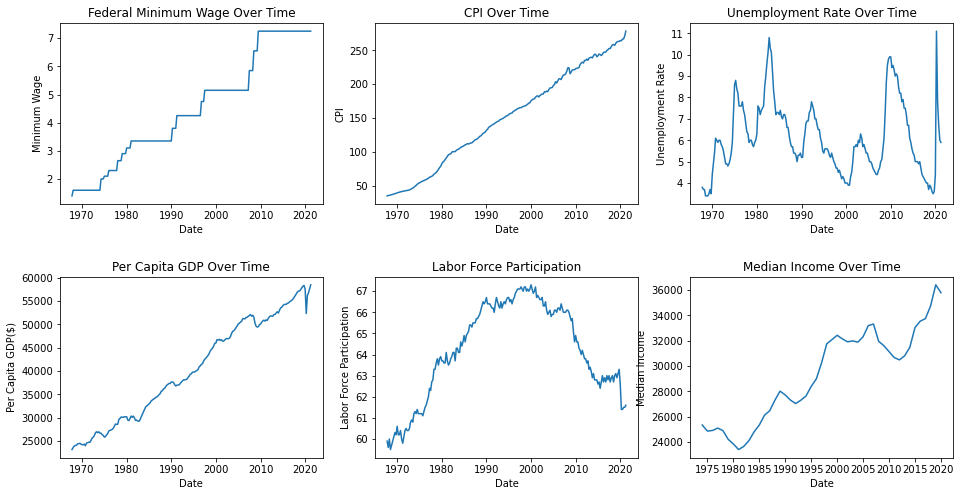

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
fig.subplots_adjust(hspace=.4)

ax[0, 0].plot(df["Date"], df["Min Wage"])
ax[0, 0].set_xlabel("Date")
ax[0, 0].set_ylabel("Minimum Wage")
ax[0, 0].set_title("Federal Minimum Wage Over Time")

ax[0, 1].plot(df['Date'], df['CPI'])
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('CPI')
ax[0, 1].set_title('CPI Over Time')

ax[0, 2].plot(df['Date'], df['Unemployment Rate'])
ax[0, 2].set_xlabel('Date')
ax[0, 2].set_ylabel('Unemployment Rate')
ax[0, 2].set_title('Unemployment Rate Over Time')

ax[1, 0].plot(df['Date'], df['Per Capita GDP'])
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Per Capita GDP($)')
ax[1, 0].set_title('Per Capita GDP Over Time')

ax[1, 1].plot(df['Date'], df['Labor Force Participation'])
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Labor Force Participation')
ax[1, 1].set_title('Labor Force Participation')

ax[1, 2].plot(df['Date'], df['Median Income'])
ax[1, 2].set_xlabel('Date')
ax[1, 2].set_ylabel('Median Income')
ax[1, 2].set_title('Median Income Over Time')

plt.show()

What I really want to see is the change between values in given years, not necessarily the raw values themselves. I am going to create some new columns for CPI, GDP, Median Income, and Unemployment Rate, by calculated the change from quarter to quarter

In [17]:
df['CPI % increase'] = df['CPI'].pct_change()
df['GDP % increase'] = df['Per Capita GDP'].pct_change()
df['Med inc % increase'] = df['Median Income'].pct_change()
df['Unemployment Change'] = df['Unemployment Rate'].diff()

The Co-vid Pandemic of the last year and a half has had a large impact on all of our economic #'s which may skew any information we pull from this period.  Since it as the very end of our time range, we have more than enough info to simply elimate the last rows of the database.

In [18]:
df.tail()

,Date,Min Wage,CPI,Unemployment Rate,Per Capita GDP,Labor Force Participation,Median Income,CPI % increase,GDP % increase,Med inc % increase,Unemployment Change
210,2020-04-01,7.25,264.14,11.1,52314.0,61.4,NaN,-0.001210,-0.090381,0.0,6.7
211,2020-07-01,7.25,266.68,7.8,56182.0,61.4,NaN,0.009616,0.073938,0.0,-3.3
212,2020-10-01,7.25,266.88,6.7,56732.0,61.5,NaN,0.000750,0.009790,0.0,-1.1
213,2021-01-01,7.25,271.39,6.0,57568.0,61.5,NaN,0.016899,0.014736,0.0,-0.7
214,2021-04-01,7.25,278.38,5.9,58454.0,61.6,NaN,0.025756,0.015390,0.0,-0.1


In [19]:
df.drop(df.tail(5).index, inplace=True)

As we don't have the data prior to October, 1967, and there is an immediate adjustment in minimum wage right after that, I am going to cut off the first few rows of data to allow us to start at a time when there has been no minimum wage increase for at least one year.

In [20]:
df.drop(df.index[:5], inplace=True)
df=df.reset_index(drop=True)
df.shape

(205, 11)

In [21]:
df['Min Wage'].unique()

array([1.6 , 2.  , 2.1 , 2.3 , 2.65, 2.9 , 3.1 , 3.35, 3.8 , 4.25, 4.75,
       5.15, 5.85, 6.55, 7.25])

For modeling and data exploration purposes, I am going to add a new column called "Min Wage Inc".  This column will indicate whether the quarter being observed occurs within one year of a federal minimum wage hike.  

In [22]:
df['Min Wage Inc'] = ''

for i in range(0, len(df)):
    if i <4:
        df['Min Wage Inc'][i] = 'no increase'
    elif df['Min Wage'][i] > df['Min Wage'][(i-4)] or (df['Min Wage'][i] > df['Min Wage'][(i-3)]) or (df['Min Wage'][i] > df['Min Wage'][(i-2)]) or (df['Min Wage'][i] > df['Min Wage'][(i-1)]):
        df['Min Wage Inc'][i] = 'increase' 
    else:
        df['Min Wage Inc'][i] = 'no increase'

print(df['Min Wage Inc'].value_counts())
df.sample(5)

no increase    151
increase        54
Name: Min Wage Inc, dtype: int64


<ipython-input-22-0ef2f9f34848>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Min Wage Inc'][i] = 'no increase'
<ipython-input-22-0ef2f9f34848>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Min Wage Inc'][i] = 'no increase'
<ipython-input-22-0ef2f9f34848>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Min Wage Inc'][i] = 'increase'


,Date,Min Wage,CPI,Unemployment Rate,Per Capita GDP,Labor Force Participation,Median Income,CPI % increase,GDP % increase,Med inc % increase,Unemployment Change,Min Wage Inc
198,2018-07-01,7.25,258.65,3.7,57095.0,62.7,35585.50,0.001782,0.003392,0.011951,-0.3,no increase
41,1979-04-01,2.90,74.08,5.7,30050.0,63.5,24101.25,0.035794,-0.001528,-0.003792,-0.1,increase
95,1992-10-01,4.25,145.39,7.4,38102.0,66.3,27223.00,0.004283,0.006951,0.002430,-0.2,no increase
162,2009-07-01,7.25,221.28,9.8,49473.0,65.1,31374.00,0.001267,0.001316,-0.003684,0.3,increase
147,2005-10-01,5.15,201.64,4.9,50629.0,66.0,32977.75,-0.010064,0.003150,0.006693,-0.1,no increase


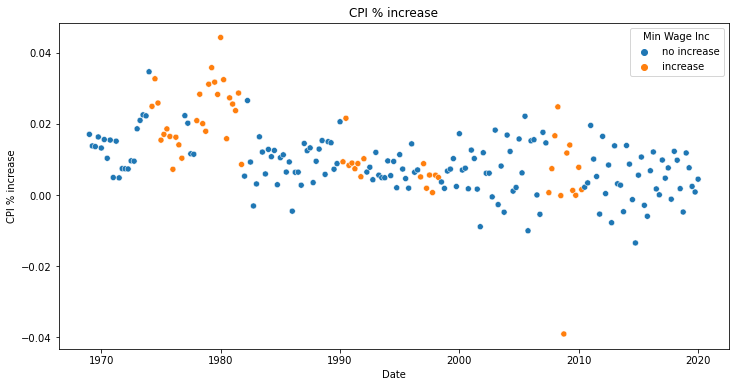

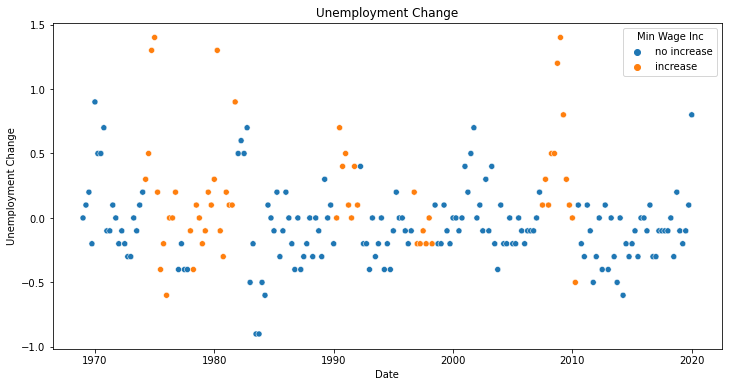

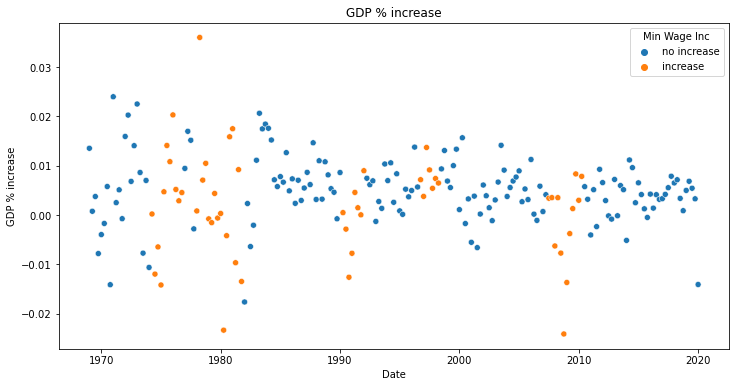

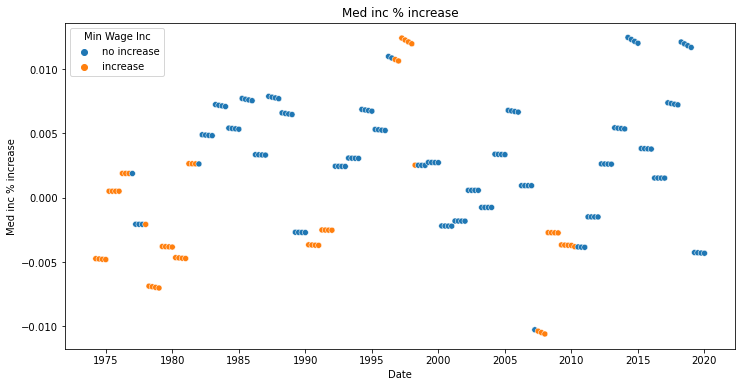

In [23]:
change_cols = ['CPI % increase', 'Unemployment Change', 'GDP % increase', 'Med inc % increase' ]

for item in change_cols:
    plt.figure(figsize = (12, 6))
    plt.title(item)
    sns.scatterplot(data = df, x='Date', y=item , hue = 'Min Wage Inc')
    plt.show()

I'm going to stick to 4 specific variables for the later A/B test, so I can now drop some columns from the dataframe

In [24]:
df = df.drop(columns = ['Min Wage', 'CPI', 'Unemployment Rate', 'Per Capita GDP', 'Labor Force Participation', 'Median Income'])
df

,Date,CPI % increase,GDP % increase,Med inc % increase,Unemployment Change,Min Wage Inc
0,1969-01-01,0.017047,0.013553,NaN,0.0,no increase
1,1969-04-01,0.013788,0.000779,NaN,0.1,no increase
2,1969-07-01,0.013600,0.003771,NaN,0.2,no increase
3,1969-10-01,0.016311,-0.007799,NaN,-0.2,no increase
4,1970-01-01,0.013202,-0.003951,NaN,0.9,no increase
...,...,...,...,...,...,...
200,2019-01-01,0.011810,0.005005,0.011672,-0.1,no increase
201,2019-04-01,0.007641,0.006860,-0.004262,-0.2,no increase
202,2019-07-01,0.002401,0.005447,-0.004280,-0.1,no increase
203,2019-10-01,0.000836,0.003302,-0.004299,0.1,no increase


In [25]:
df.groupby('Min Wage Inc').mean()

,CPI % increase,GDP % increase,Med inc % increase,Unemployment Change
Min Wage Inc,,,,
increase,0.014406,0.001848,-0.001491,0.205556
no increase,0.008114,0.005167,0.003305,-0.066887


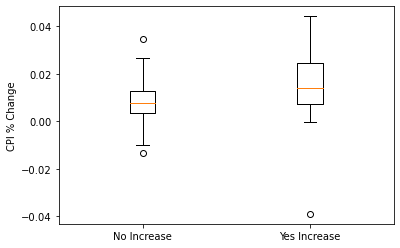

In [26]:
increase = df[df['Min Wage Inc'] == 'increase']
no_increase = df[df['Min Wage Inc'] == 'no increase']

plt.boxplot([no_increase['CPI % increase'], increase['CPI % increase']])
plt.ylabel('CPI % Change')
plt.xticks([1, 2], ['No Increase', 'Yes Increase'])
plt.show()

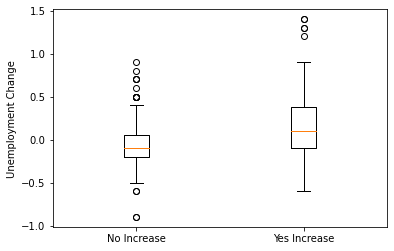

In [27]:
plt.boxplot([no_increase['Unemployment Change'], increase['Unemployment Change']])
plt.ylabel('Unemployment Change')
plt.xticks([1, 2], ['No Increase', 'Yes Increase'])
plt.show()

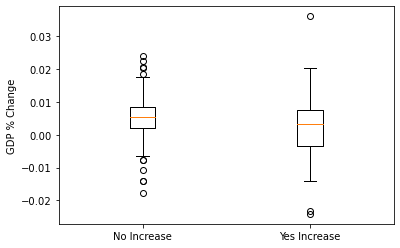

In [28]:
plt.boxplot([no_increase['GDP % increase'], increase['GDP % increase']])
plt.ylabel('GDP % Change')
plt.xticks([1, 2], ['No Increase', 'Yes Increase'])
plt.show()

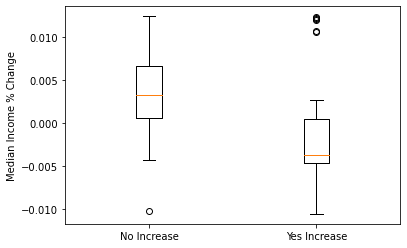

In [29]:
#Have to Filter the NaN's out for Median income

filt_no_inc = no_increase[~np.isnan(no_increase['Med inc % increase'])]
filt_inc = increase[~np.isnan(increase['Med inc % increase'])]
plt.boxplot([filt_no_inc['Med inc % increase'], filt_inc['Med inc % increase']])
plt.ylabel('Median Income % Change')
plt.xticks([1, 2], ['No Increase', 'Yes Increase'])
plt.show()

The Average of each economic indicator is a little bit "worse" # when taken from periods during and after minimum wage changes. For GDP and Median Income, there appears to be slightly less growth during min wage increase years.  The CPI appears to increase slightly more following increases.  Most notably, the Unemployment rate appears to show the largest difference.  In the years of minimum wage increases, we show unemployment #'s averaging an **increase** of 0.2, as compared to slight **decrease** of around 0.06 in other years.

The next step will be to determine if the difference in these #'s is large enough to consider the minimum wage a clear determinant of these changes.

I need to figure out how the data is distributed....

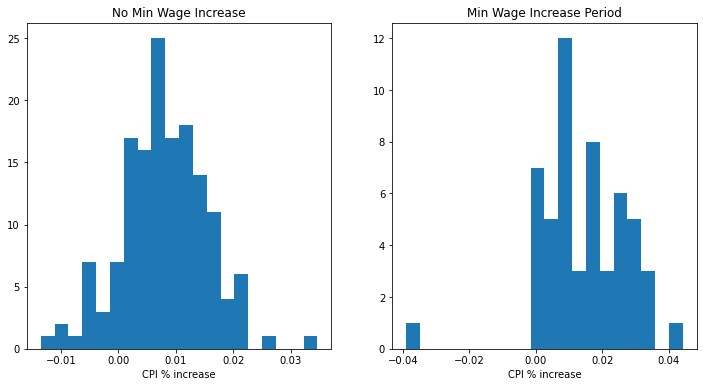

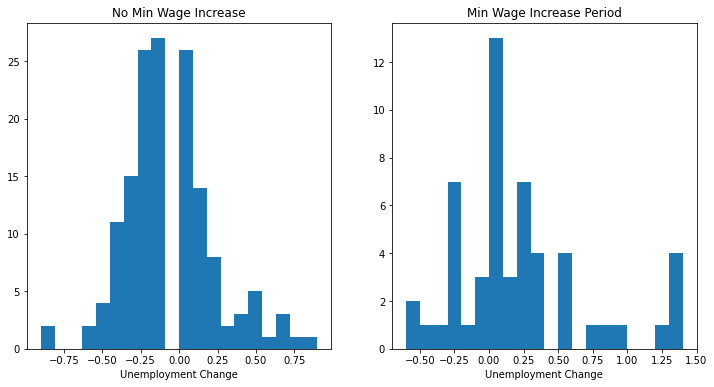

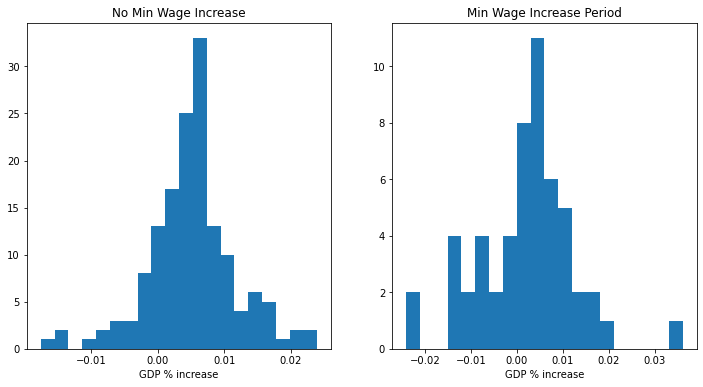

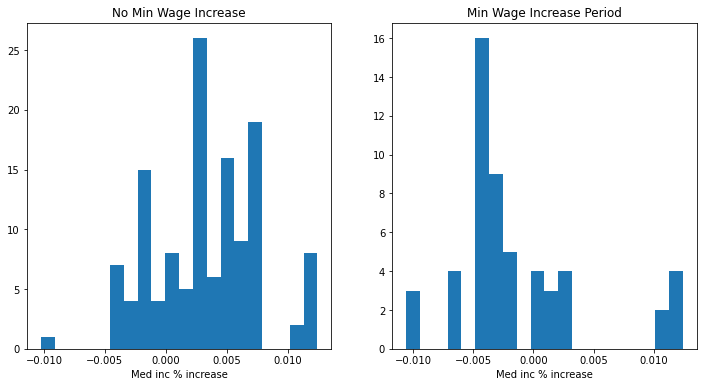

In [30]:
for item in change_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    fig.subplots_adjust(hspace=.4)
    ax[0].hist(no_increase[item], bins=20)
    ax[0].set_xlabel(item)
    ax[0].set_title("No Min Wage Increase")
    ax[1].hist(increase[item], bins=20)
    ax[1].set_xlabel(item)
    ax[1].set_title("Min Wage Increase Period")
    plt.show()

The Plots give us an idea of distribution, but we need to run a stats.normal test to determine if our distributions are normal.  A P-Value below .05 indicates we can assume that that specific dataset is likely <b>not</b> normally distributed.

In [31]:
normal = stats.normaltest(no_increase['CPI % increase'])
print(normal)

normal = stats.normaltest(increase['CPI % increase'])
print(normal)

NormaltestResult(statistic=2.706973295902903, pvalue=0.2583379550472494)
NormaltestResult(statistic=17.150497094320333, pvalue=0.0001887195424875433)


In [32]:
normal = stats.normaltest(no_increase['Unemployment Change'])
print(normal)

normal = stats.normaltest(increase['Unemployment Change'])
print(normal)

NormaltestResult(statistic=17.012346597995634, pvalue=0.00020221616701754058)
NormaltestResult(statistic=11.555905138249422, pvalue=0.00309504581785522)


In [33]:
normal = stats.normaltest(no_increase['GDP % increase'])
print(normal)

normal = stats.normaltest(increase['GDP % increase'])
print(normal)


NormaltestResult(statistic=7.72729556890979, pvalue=0.020991288000497658)
NormaltestResult(statistic=4.342229574861441, pvalue=0.11405040405945302)


In [34]:
normal = stats.normaltest(filt_no_inc['Med inc % increase'])
print(normal)

normal = stats.normaltest(filt_inc['Med inc % increase'])
print(normal)



NormaltestResult(statistic=0.1326433991432308, pvalue=0.9358297598287855)
NormaltestResult(statistic=13.66170481424139, pvalue=0.0010799371790104827)


In a couple of cases, one of the data sets appears to have a normal distribution, but only one.  Because of this, I will proceed without assuming normal distributions

# Outline of my method:

For testing purposes, We'll assume the null hypothesis that whether a quarter falls within a year of a minimum wage increase has no impact on the main economic indicators of GDP, CPI, unemployment, and median income. 

Given this prediction, if we were to shuffle all of our quarters in to 2 random sets, we should be able to get a similar difference in the means of each indicator as we got when averaging quarters during increases against those not following minimum wage increases. 

Currently, we show higher unemployment change and CPI increases during our quarters following mimimum wage increases, and higher GDP and median income growth during quarters when there has been no recent increase.

The more we continue to shuffle and randomize the 2 sets we are comparing, the better indication of how likely it would be to receive our initial results, given the null hypothesis. After running multiple permutations, we will take a mean of the difference of means found during each permutation, which will serve as a primary indicator of whether our hypothesis is correct or not.

If the observed difference for each indicator looks just like the permutation difference, it would appear that the hypothesis that minimum wage raises have no significant effect on that economic indicator is true. However, if our permutation difference varies from our originally found difference of means, we may be able to consider that minimum wage raises do, in fact, have a statistically significant effect on that specific indicator.

## Null Hypothesis

**H<sub>null</sub>**: the difference in means of all observed variables between periods of minimum wage increase and periods without minimum wage increase is due to random occurence, and not due to any effect caused my a federal minimum wage increase.

**H<sub>alternative</sub>**: the observed difference in the means of each dependent variable must be due to the impact of raising the federal minimum wage.

Using a **significance level** of 0.005. 

In [35]:
df['Permutation_cpi'] = np.random.permutation(df['CPI % increase'])
df['Permutation_gdp'] = np.random.permutation(df['GDP % increase'])
df['Permutation_unemp'] = np.random.permutation(df['Unemployment Change'])
df['Permutation_medinc'] = np.random.permutation(df['Med inc % increase'])
df.groupby('Min Wage Inc').mean()

,CPI % increase,GDP % increase,Med inc % increase,Unemployment Change,Permutation_cpi,Permutation_gdp,Permutation_unemp,Permutation_medinc
Min Wage Inc,,,,,,,,
increase,0.014406,0.001848,-0.001491,0.205556,0.008939,0.004453,-0.024074,0.002477
no increase,0.008114,0.005167,0.003305,-0.066887,0.010069,0.004236,0.015232,0.001675


For all of our variables, the observed differences of means in the permutations are much smaller than the observed difference of means in our 2 datasets.  If I now repeat this several times on each variable, we should get a idea of whether our original observed difference in means could truly be considered random.

I'll start with the CPI variable, and move on to the other variables one by one.

In [36]:
np.random.seed(42)
difference = np.empty(10000)
for i in range(10000):
    df['Permutation_cpi'] = np.random.permutation(df['CPI % increase'])
    diff = np.mean(df.Permutation_cpi[df['Min Wage Inc'] == 'increase']) - np.mean(df.Permutation_cpi[df['Min Wage Inc'] == 'no increase'])
    difference[i] = diff

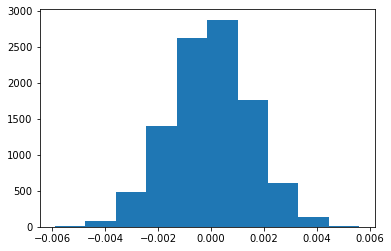

In [37]:
plt.hist(difference)
plt.show()

In [38]:
obs_diff = abs(np.mean(increase['CPI % increase']) - np.mean(no_increase['CPI % increase']))
obs_diff

0.006292810137013835

In [39]:
p = np.sum(difference >= obs_diff)/len(difference)
print('P-Value is', p)

P-Value is 0.0


NONE of the 10,000 permutations result in as large a difference in means as our original observed difference.  For CPI % increases, we can say with certainty that the larger increases found during minimum wage increases are NOT due to random chance, and therefore must be due to the affect of federal minimum wage hikes.

In [40]:
difference = np.empty(10000)
for i in range(10000):
    df['Permutation_gdp'] = np.random.permutation(df['GDP % increase'])
    diff = np.mean(df.Permutation_gdp[df['Min Wage Inc'] == 'increase']) - np.mean(df.Permutation_gdp[df['Min Wage Inc'] == 'no increase'])
    difference[i] = diff

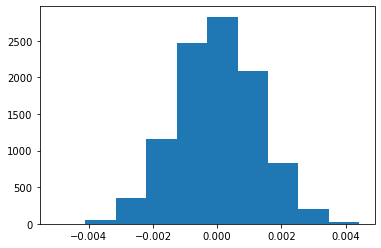

In [41]:
plt.hist(difference)
plt.show()

In [42]:
obs_diff = abs(np.mean(increase['GDP % increase']) - np.mean(no_increase['GDP % increase']))
obs_diff

0.003319051726304063

In [43]:
p = np.sum(difference >= obs_diff)/len(difference)
print('P-Value is', p)

P-Value is 0.0034


For GDP % increase, we have a higher P-Value, but it is still less than 0.005.

In [44]:
difference = np.empty(10000)
for i in range(10000):
    df['Permutation_unemp'] = np.random.permutation(df['Unemployment Change'])
    diff = np.mean(df.Permutation_unemp[df['Min Wage Inc'] == 'increase']) - np.mean(df.Permutation_unemp[df['Min Wage Inc'] == 'no increase'])
    difference[i] = diff

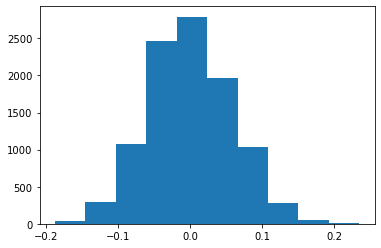

In [45]:
plt.hist(difference)
plt.show()

In [46]:
obs_diff = abs(np.mean(increase['Unemployment Change']) - np.mean(no_increase['Unemployment Change']))
obs_diff

0.2724429727740986

In [47]:
p = np.sum(difference >= obs_diff)/len(difference)
print('P-Value is', p)

P-Value is 0.0


In [48]:
difference.max()

0.23473142016188375

For Unemployment rate change, not only were none of the permutation mean differences as large as the observed mean, none of them came particularly close.  Our most extreme mean differences from the permutation samples were around 0.23, while our true observed difference was 0.27.  This leaves pretty much no doubt that minimum wage increases definitely due lead to slightly higher unemployment #'s.

In [49]:
difference = np.empty(10000)
for i in range(10000):
    df['Permutation_medinc'] = np.random.permutation(df['Med inc % increase'])
    diff = np.mean(df.Permutation_medinc[df['Min Wage Inc'] == 'increase']) - np.mean(df.Permutation_medinc[df['Min Wage Inc'] == 'no increase'])
    difference[i] = diff

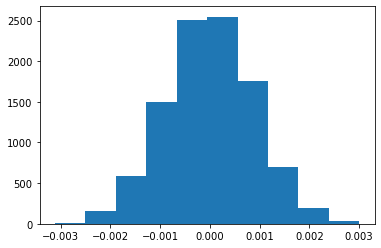

In [50]:
plt.hist(difference)
plt.show()

In [51]:
obs_diff = abs(np.mean(increase['Med inc % increase']) - np.mean(no_increase['Med inc % increase']))
obs_diff

0.004796310132646383

In [52]:
p = np.sum(difference >= obs_diff)/len(difference)
print('P-Value is', p)

P-Value is 0.0


On Median Income change, we also see no permutation mean differences as large as our observed difference.  This means that we can REJECT the Null Hypothesis when it comes to all 4 variables.  None of our observed differences can be attributed to random occurence or chance.